# Question 7: Q-Learning for Maze Navigation

State: [0 1], Reward: -0.1, Done: False


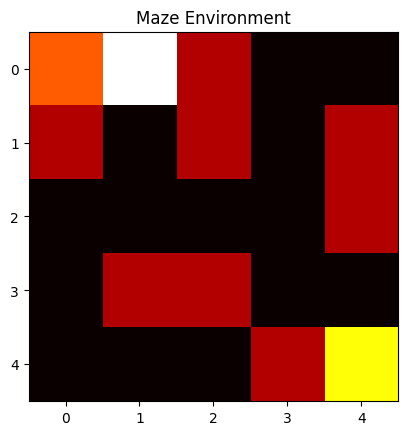

State: [0 0], Reward: -0.1, Done: False


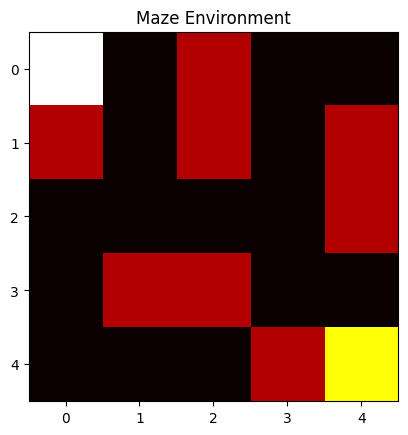

State: [0 1], Reward: -0.1, Done: False


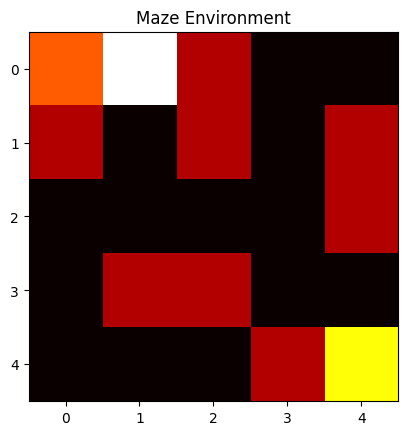

State: [1 1], Reward: -0.1, Done: False


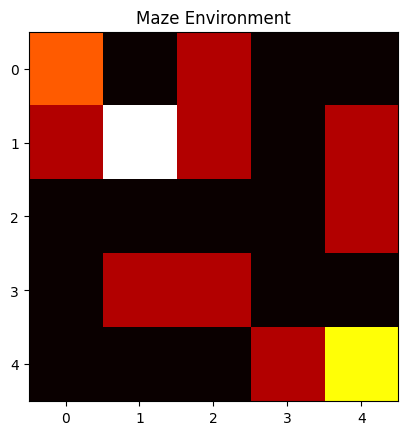

State: [0 1], Reward: -0.1, Done: False


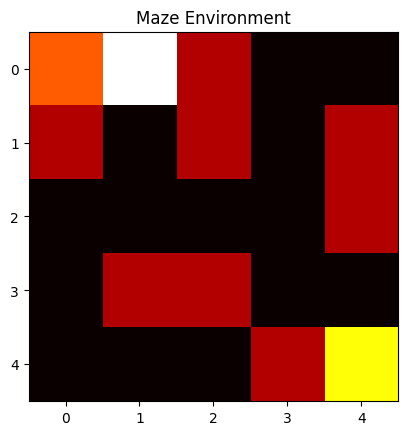

State: [0 1], Reward: -0.1, Done: False


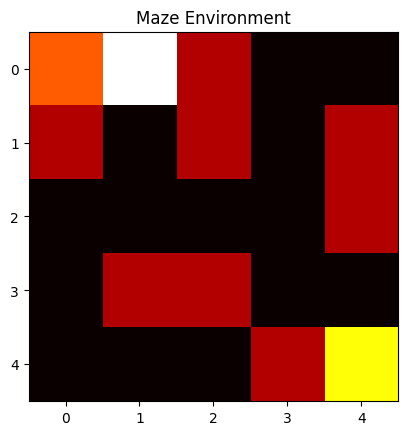

State: [0 1], Reward: -0.1, Done: False


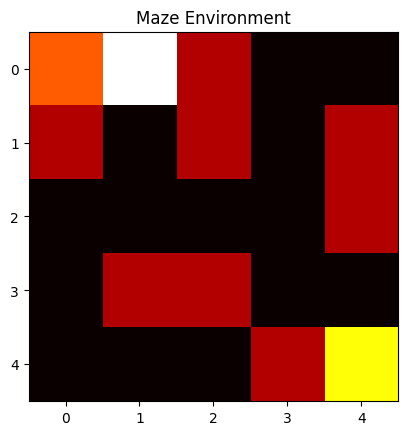

State: [0 0], Reward: -0.1, Done: False


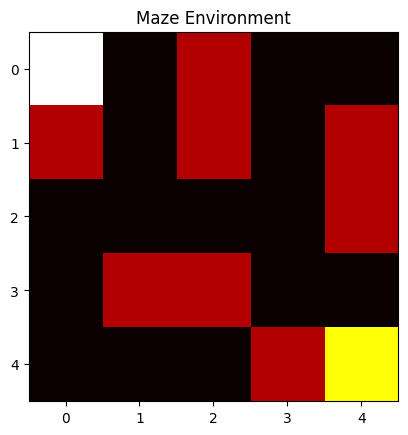

State: [0 0], Reward: -0.1, Done: False


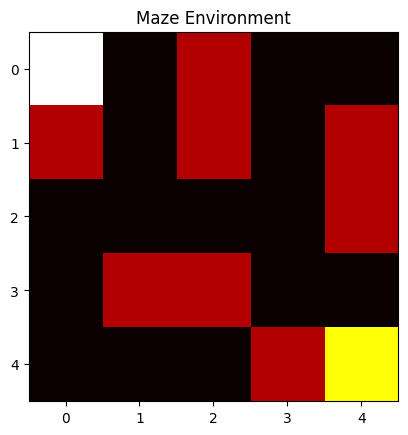

State: [0 0], Reward: -0.1, Done: False


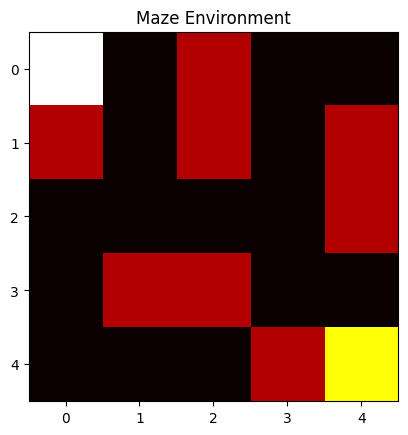

State: [0 0], Reward: -0.1, Done: False


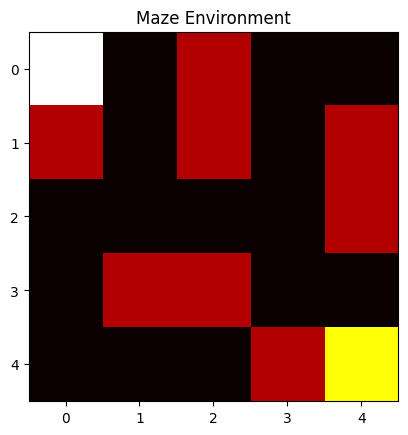

State: [0 0], Reward: -0.1, Done: False


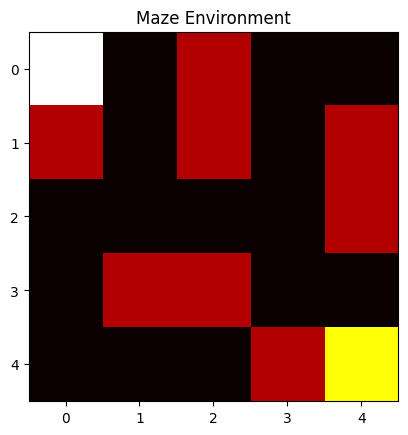

State: [0 0], Reward: -0.1, Done: False


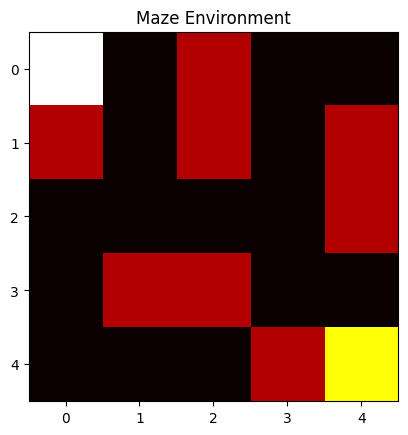

State: [0 1], Reward: -0.1, Done: False


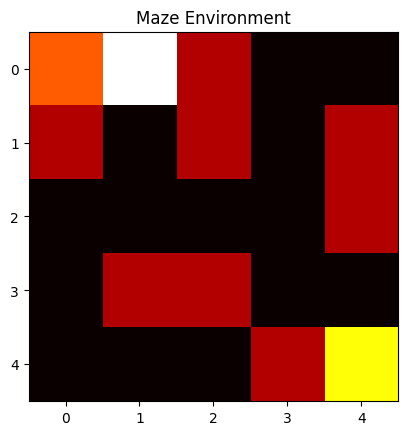

State: [0 1], Reward: -0.1, Done: False


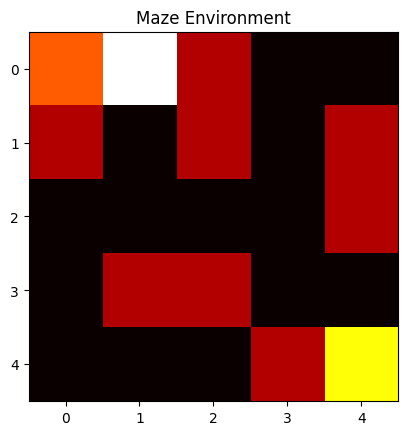

State: [1 1], Reward: -0.1, Done: False


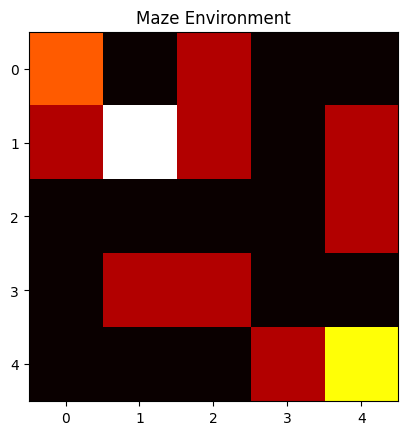

State: [2 1], Reward: -0.1, Done: False


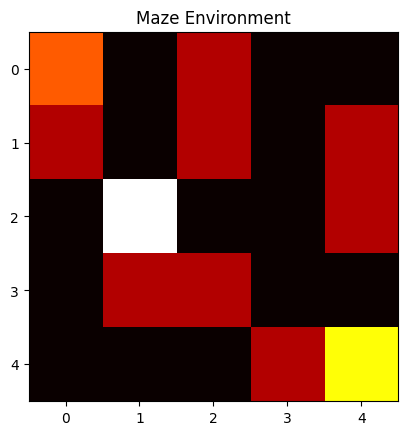

State: [2 0], Reward: -0.1, Done: False


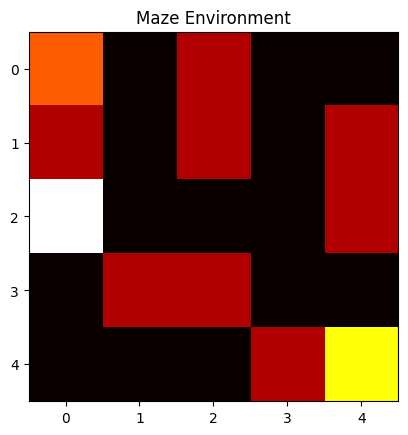

State: [3 0], Reward: -0.1, Done: False


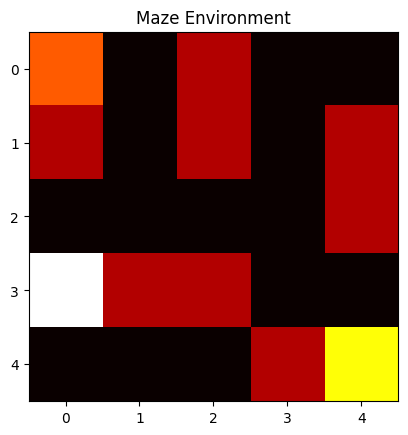

State: [4 0], Reward: -0.1, Done: False


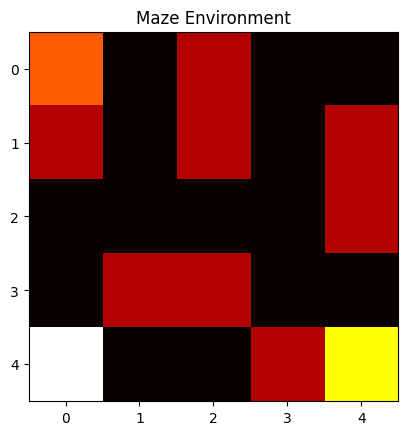

State: [4 1], Reward: -0.1, Done: False


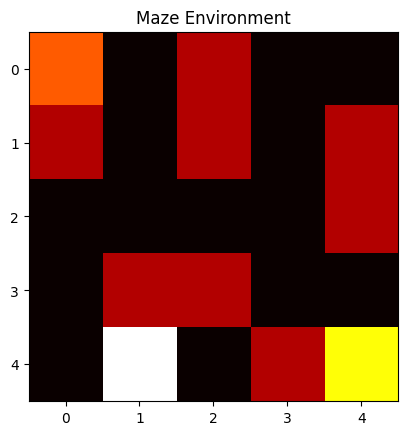

State: [4 0], Reward: -0.1, Done: False


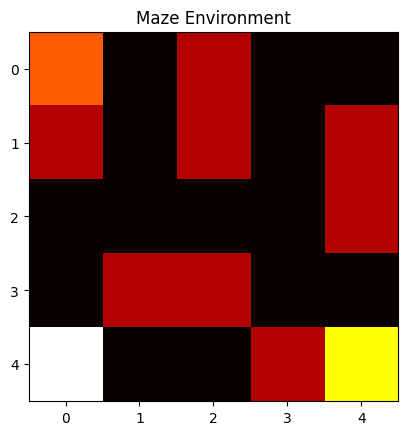

State: [3 0], Reward: -0.1, Done: False


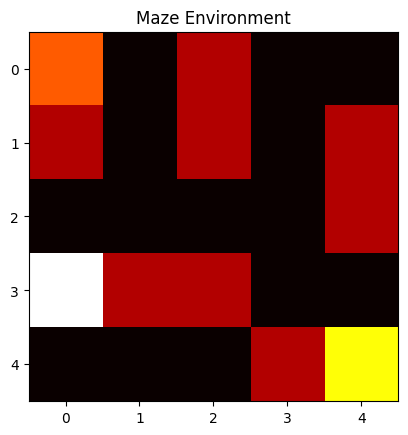

State: [3 0], Reward: -0.1, Done: False


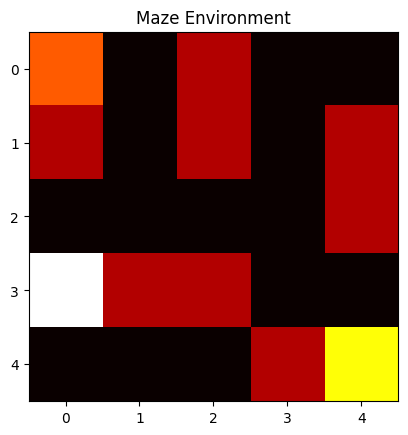

State: [4 0], Reward: -0.1, Done: False


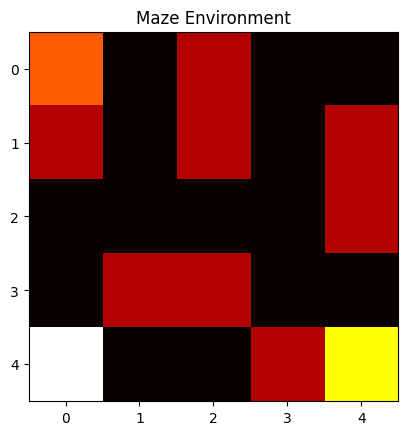

State: [4 0], Reward: -0.1, Done: False


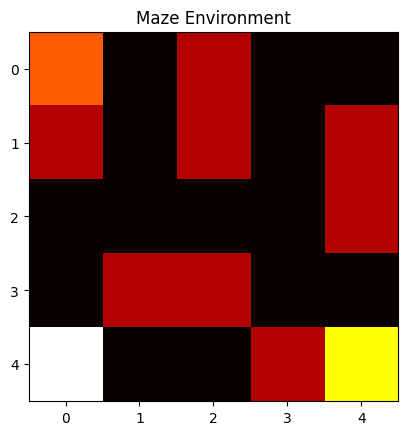

State: [3 0], Reward: -0.1, Done: False


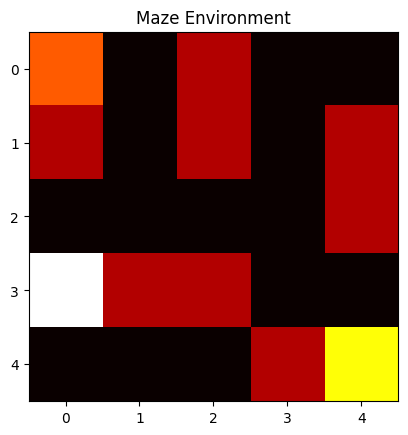

State: [4 0], Reward: -0.1, Done: False


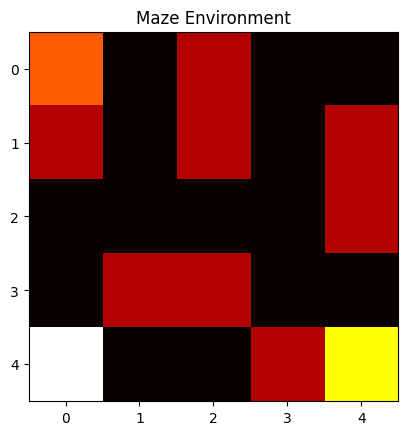

State: [3 0], Reward: -0.1, Done: False


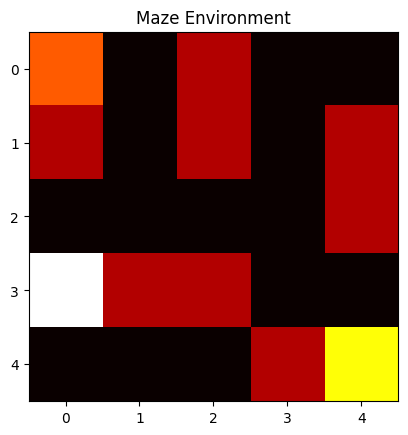

State: [3 0], Reward: -0.1, Done: False


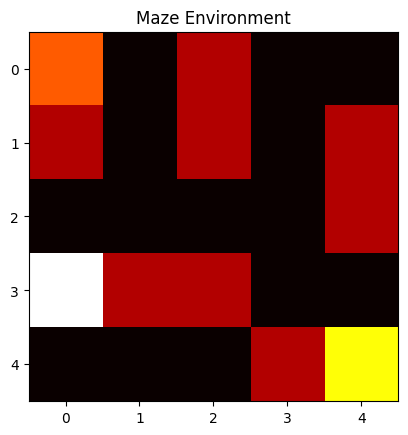

State: [4 0], Reward: -0.1, Done: False


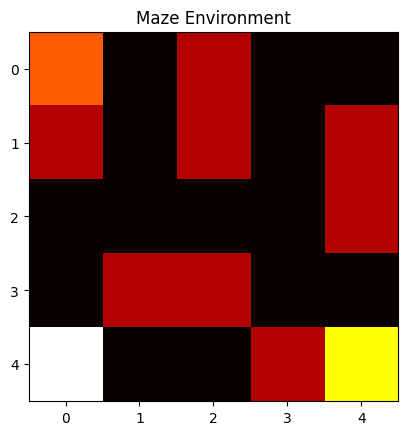

State: [4 0], Reward: -0.1, Done: False


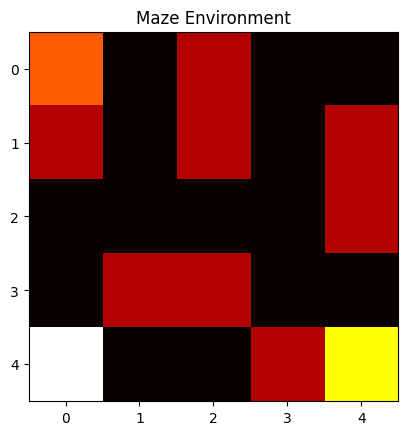

State: [4 0], Reward: -0.1, Done: False


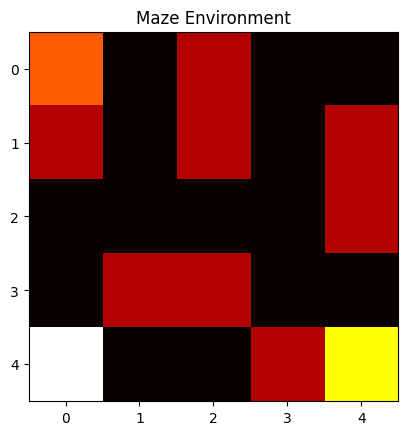

State: [4 1], Reward: -0.1, Done: False


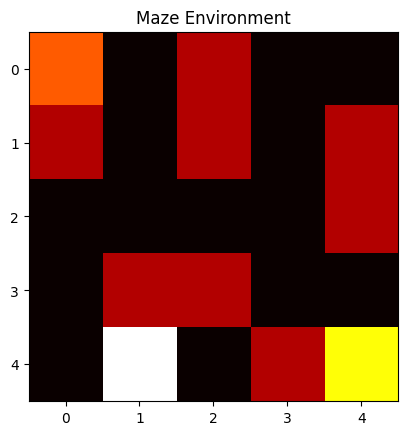

State: [4 2], Reward: -0.1, Done: False


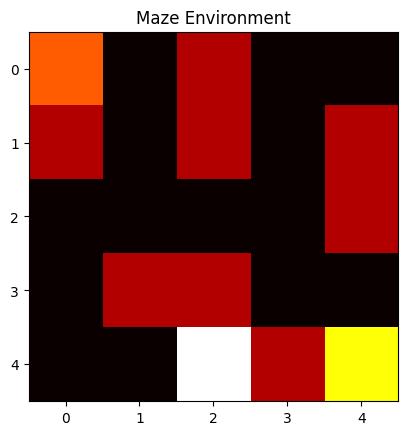

State: [4 1], Reward: -0.1, Done: False


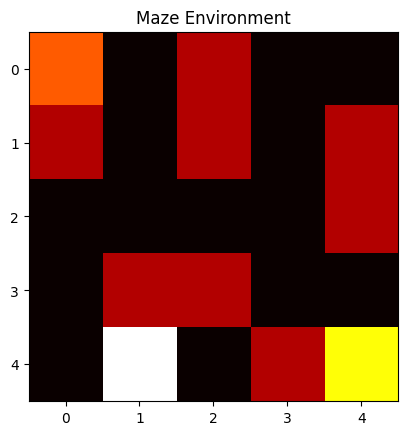

State: [4 2], Reward: -0.1, Done: False


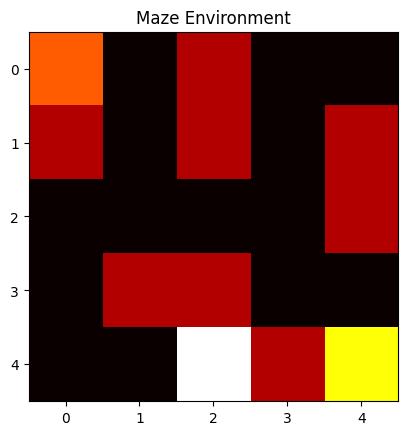

State: [4 2], Reward: -0.1, Done: False


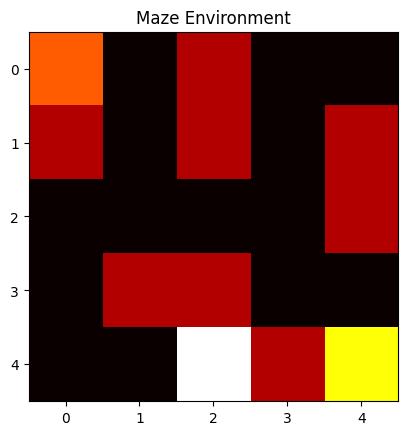

State: [4 2], Reward: -0.1, Done: False


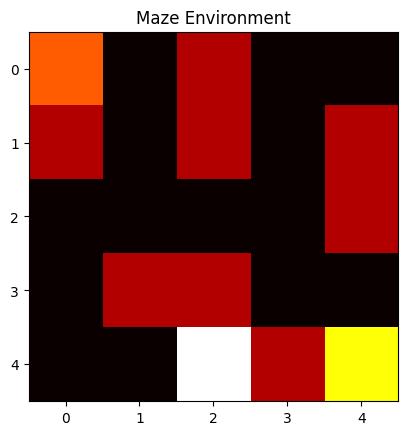

State: [4 2], Reward: -0.1, Done: False


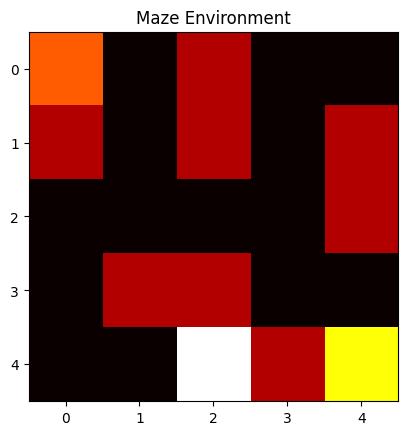

State: [4 2], Reward: -0.1, Done: False


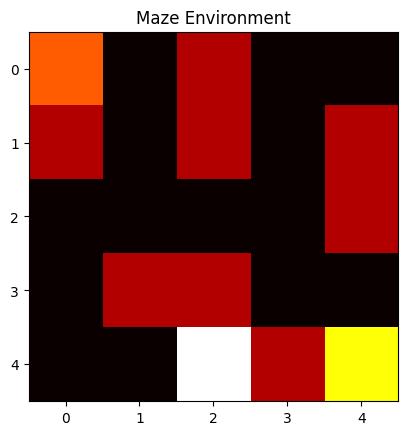

State: [4 2], Reward: -0.1, Done: False


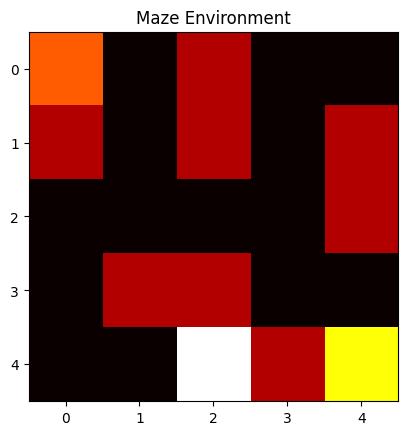

State: [4 2], Reward: -0.1, Done: False


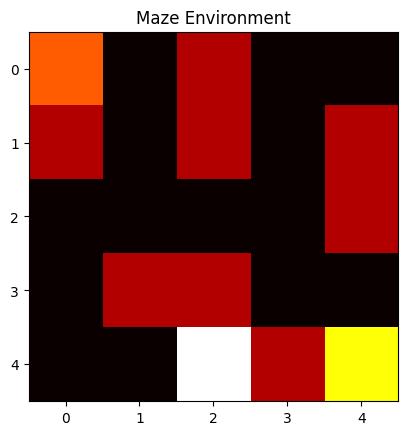

State: [4 2], Reward: -0.1, Done: False


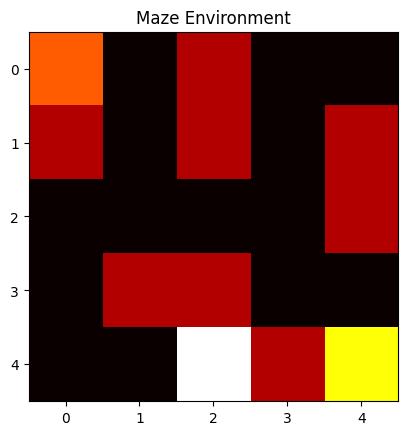

State: [4 2], Reward: -0.1, Done: False


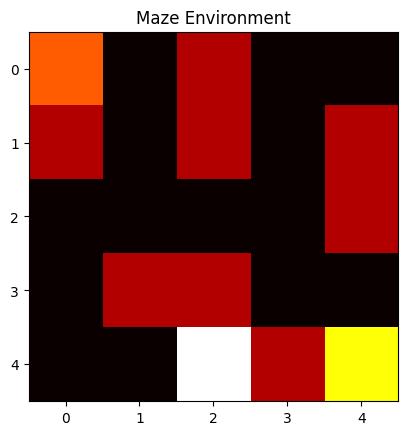

State: [4 2], Reward: -0.1, Done: False


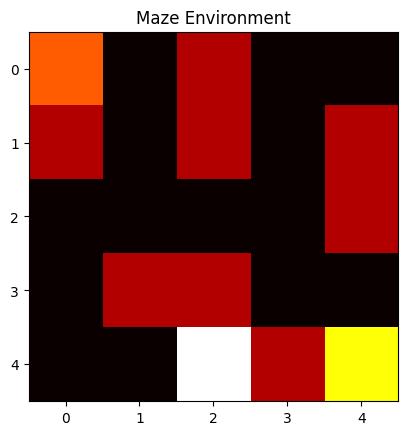

State: [4 2], Reward: -0.1, Done: False


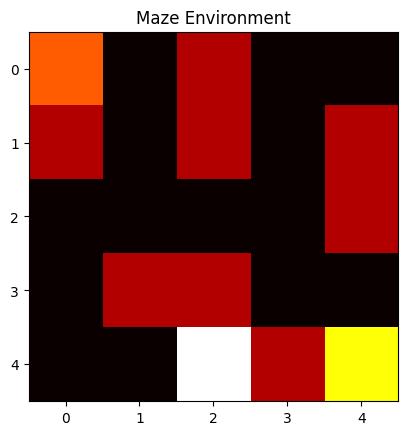

State: [4 2], Reward: -0.1, Done: False


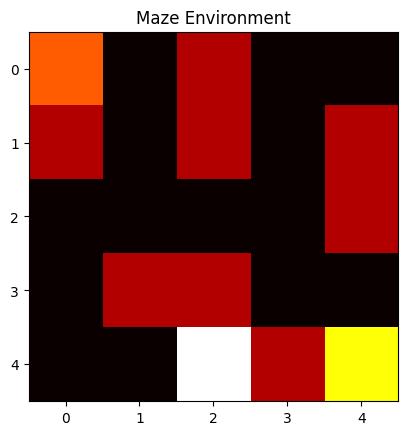

State: [4 2], Reward: -0.1, Done: False


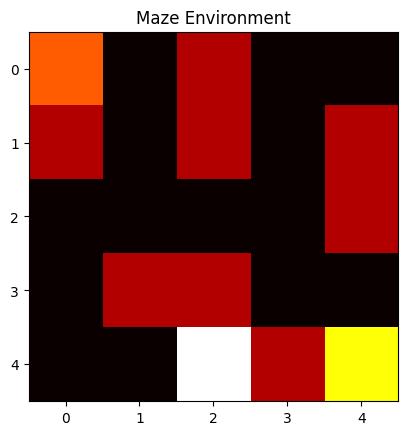

State: [4 2], Reward: -0.1, Done: False


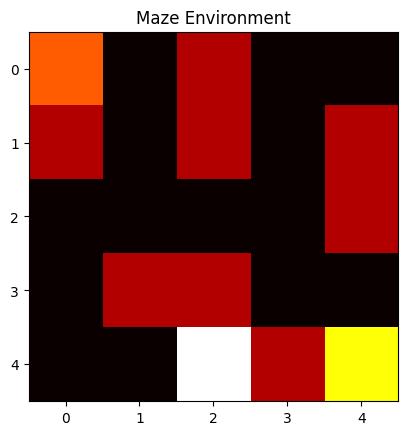

In [2]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt

class CustomMazeEnv(gym.Env):
    def __init__(self, maze):
        super(CustomMazeEnv, self).__init__()
        self.maze = np.array(maze)
        self.start_pos = tuple(np.argwhere(self.maze == 2)[0])
        self.goal_pos = tuple(np.argwhere(self.maze == 3)[0])
        self.action_space = spaces.Discrete(4)  # 0: up, 1: right, 2: down, 3: left
        self.observation_space = spaces.Box(low=0, high=max(self.maze.shape), shape=(2,), dtype=np.int32)
        self.agent_pos = self.start_pos

    def reset(self):
        self.agent_pos = self.start_pos
        return np.array(self.agent_pos, dtype=np.int32)

    def step(self, action):
        directions = {0: (-1, 0), 1: (0, 1), 2: (1, 0), 3: (0, -1)}
        new_pos = (self.agent_pos[0] + directions[action][0], self.agent_pos[1] + directions[action][1])
        if (0 <= new_pos[0] < self.maze.shape[0] and
            0 <= new_pos[1] < self.maze.shape[1] and
            self.maze[new_pos] != 1):
            self.agent_pos = new_pos
        done = self.agent_pos == self.goal_pos
        reward = 1 if done else -0.1
        return np.array(self.agent_pos, dtype=np.int32), reward, done, {}

    def render(self):
        maze_render = self.maze.copy()
        maze_render[self.agent_pos] = 4
        plt.imshow(maze_render, cmap='hot', interpolation='nearest')
        plt.title("Maze Environment")
        plt.show()

# Define the maze
maze = [
    [2, 0, 1, 0, 0],
    [1, 0, 1, 0, 1],
    [0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 3]
]

# Create the environment
env = CustomMazeEnv(maze)

# Test the environment
state = env.reset()
done = False
max_steps = 50  # Limit the number of steps to prevent infinite loops

for _ in range(max_steps):
    if done:
        break
    action = env.action_space.sample()  # Random action
    state, reward, done, _ = env.step(action)
    print(f"State: {state}, Reward: {reward}, Done: {done}")
    env.render()

Episode 100/1000, Total Reward: -2.2000000000000015, Epsilon: 0.6058
Episode 200/1000, Total Reward: 0.20000000000000007, Epsilon: 0.3670
Episode 300/1000, Total Reward: 0.10000000000000009, Epsilon: 0.2223
Episode 400/1000, Total Reward: 0.20000000000000007, Epsilon: 0.1347
Episode 500/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0816
Episode 600/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0494
Episode 700/1000, Total Reward: 0.20000000000000007, Epsilon: 0.0299
Episode 800/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0181
Episode 900/1000, Total Reward: 0.30000000000000004, Epsilon: 0.0110
Episode 1000/1000, Total Reward: 0.20000000000000007, Epsilon: 0.0100


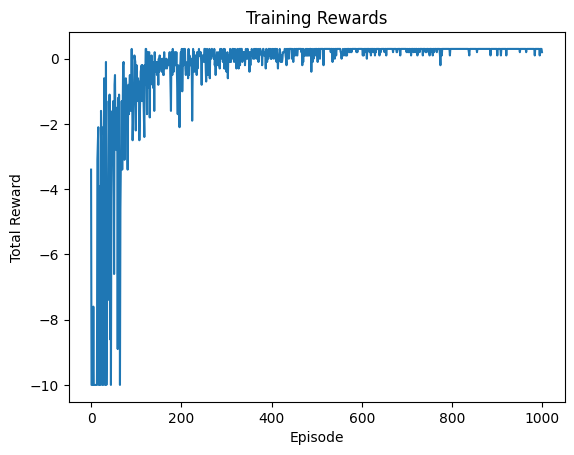

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Q-learning agent
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.q_table = np.zeros((env.maze.shape[0], env.maze.shape[1], env.action_space.n))  # Q-table

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()  # Explore
        else:
            return np.argmax(self.q_table[state[0], state[1]])  # Exploit

    def update_q_value(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1]])
        td_target = reward + (self.discount_factor * self.q_table[next_state[0], next_state[1], best_next_action] * (1 - done))
        td_error = td_target - self.q_table[state[0], state[1], action]
        self.q_table[state[0], state[1], action] += self.learning_rate * td_error

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

# Initialize and train the agent
env = CustomMazeEnv(maze)
agent = QLearningAgent(env)

def train_agent(env, agent, episodes=1000, max_steps=100):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        for step in range(max_steps):
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.update_q_value(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            if done:
                break
        agent.decay_epsilon()
        rewards.append(total_reward)
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.4f}")
    return rewards

rewards = train_agent(env, agent)

# Plot training rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Rewards")
plt.show()

In [4]:
def visualize_policy(agent, env):
    policy = np.zeros_like(env.maze, dtype=str)
    directions = {0: "↑", 1: "→", 2: "↓", 3: "←"}

    for i in range(env.maze.shape[0]):
        for j in range(env.maze.shape[1]):
            if env.maze[i, j] == 1:  # Wall
                policy[i, j] = "█"
            elif env.maze[i, j] == 2:  # Start
                policy[i, j] = "S"
            elif env.maze[i, j] == 3:  # Goal
                policy[i, j] = "G"
            else:
                best_action = np.argmax(agent.q_table[i, j])
                policy[i, j] = directions[best_action]

    print("Learned Policy:")
    for row in policy:
        print(" ".join(row))

visualize_policy(agent, env)

Learned Policy:
S ↓ █ ↓ ←
█ ↓ █ ↓ █
→ → → ↓ █
↑ █ █ → ↓
← ← → █ G


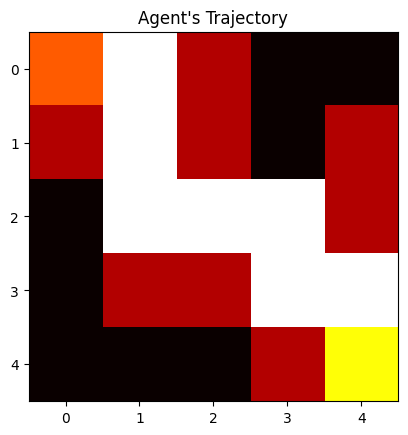

In [5]:
def simulate_trajectory(agent, env):
    state = env.reset()
    trajectory = [tuple(state)]

    for _ in range(100):  # Limit steps to avoid infinite loops
        action = np.argmax(agent.q_table[state[0], state[1]])  # Always take the best action
        next_state, _, done, _ = env.step(action)
        trajectory.append(tuple(next_state))
        state = next_state

        if done:
            break

    # Visualize the trajectory
    maze_with_trajectory = env.maze.copy()
    for pos in trajectory:
        if maze_with_trajectory[pos] == 0:  # Mark trajectory on empty spaces
            maze_with_trajectory[pos] = 4

    plt.imshow(maze_with_trajectory, cmap="hot", interpolation="nearest")
    plt.title("Agent's Trajectory")
    plt.show()

simulate_trajectory(agent, env)

C:\Users\Asus\AppData\Local\Temp\ipykernel_23944\692330627.py:58: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  states = torch.tensor(states, dtype=torch.float32).to(self.device)


Episode 100/500, Total Reward: -0.5000000000000002, Epsilon: 0.6058
Episode 200/500, Total Reward: 0.10000000000000009, Epsilon: 0.3670
Episode 200/500, Total Reward: 0.10000000000000009, Epsilon: 0.3670
Episode 300/500, Total Reward: 1.1102230246251565e-16, Epsilon: 0.2223
Episode 300/500, Total Reward: 1.1102230246251565e-16, Epsilon: 0.2223
Episode 400/500, Total Reward: 0.30000000000000004, Epsilon: 0.1347
Episode 400/500, Total Reward: 0.30000000000000004, Epsilon: 0.1347
Episode 500/500, Total Reward: 0.10000000000000009, Epsilon: 0.0816


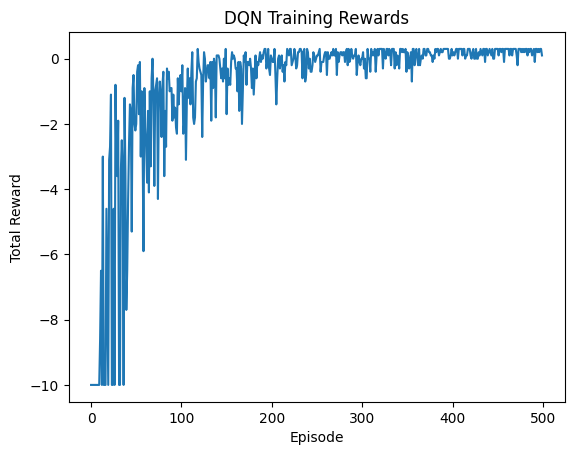

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define the DQN network
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Define the DQN agent
class DQNAgent:
    def __init__(self, env, learning_rate=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.memory = deque(maxlen=10000)
        self.batch_size = 64

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = DQN(input_dim=env.observation_space.shape[0], output_dim=env.action_space.n).to(self.device)
        self.target_model = DQN(input_dim=env.observation_space.shape[0], output_dim=env.action_space.n).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        self.loss_fn = nn.MSELoss()

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        state = torch.tensor(state, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def train(self):
        if len(self.memory) < self.batch_size:
            return

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.tensor(states, dtype=torch.float32).to(self.device)
        actions = torch.tensor(actions, dtype=torch.long).to(self.device)
        rewards = torch.tensor(rewards, dtype=torch.float32).to(self.device)
        next_states = torch.tensor(next_states, dtype=torch.float32).to(self.device)
        dones = torch.tensor(dones, dtype=torch.float32).to(self.device)

        q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        next_q_values = self.target_model(next_states).max(1)[0]
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values

        loss = self.loss_fn(q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

# Train DQN agent
env = CustomMazeEnv(maze)
dqn_agent = DQNAgent(env)

def train_dqn_agent(env, agent, episodes=500, max_steps=100, target_update_freq=10):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        for step in range(max_steps):
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.store_transition(state, action, reward, next_state, done)
            agent.train()
            state = next_state
            total_reward += reward
            if done:
                break
        agent.decay_epsilon()
        rewards.append(total_reward)
        if (episode + 1) % target_update_freq == 0:
            agent.update_target_model()
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.4f}")
    return rewards

dqn_rewards = train_dqn_agent(env, dqn_agent)

# Plot DQN training rewards
plt.plot(dqn_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Training Rewards")
plt.show()